In [1]:
!pip install tqdm

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers 
import tensorflow.keras.models as models
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [2]:
class Actor(models.Model):
    def __init__(self):
        super(Actor, self).__init__()
        
        self.cnn = models.Sequential([
            layers.Conv2D(16, 5, activation='relu'),
            layers.MaxPooling2D(),
            layers.BatchNormalization(),
            layers.Conv2D(32, 3, activation='relu'),
            layers.MaxPooling2D(),

            layers.Flatten()
        ])
        
        self.concat = layers.Concatenate(axis=1)
        
        self.dense = models.Sequential([
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(256, activation='relu'),
            
            layers.Dense(2, activation='tanh')
        ])
        
    def call(self, inputs):
        imgs, vels = inputs
        imgsx = self.cnn(imgs)
        x = self.concat([imgsx, vels])
        x = self.dense(x)
        return x


In [3]:
picPath = "CarSIM/PIC/"
csvPath = "CarSIM/Data.csv"

In [4]:
data = pd.read_csv(csvPath)
data.head()

,PicID,Vertical,Horizontal,Velocity
0,020721-010829-248-0,0,0,0.000000
1,020721-010829-781-1,0,0,0.548092
2,020721-010829-806-2,0,0,0.023570
3,020721-010829-934-3,0,0,0.022755
4,020721-010830-072-4,0,0,0.002016


In [5]:
pics = np.empty((len(data), 256, 256, 3), dtype=np.float32)
velocities = np.empty((len(data), 1), dtype=np.float32)
controls = np.empty((len(data), 2), dtype=np.float32)
for i in tqdm.tqdm(range(len(data))):
    name = picPath+data['PicID'][i] + ".png"
    pics[i] = plt.imread(name)[:,:,:3]
    velocities[i] = [data['Velocity'][i]]
    controls[i] = (data['Vertical'][i], data['Horizontal'][i])
    
    

100%|██████████| 2050/2050 [00:11<00:00, 173.74it/s]


In [6]:
model = Actor()

In [7]:
model.compile(optimizer='sgd', loss='mean_squared_error')


In [8]:
history = model.fit((pics, velocities), controls, epochs=15, validation_split=0.2)

Epoch 1/15
52/52 [==============================] - 17s 179ms/step - loss: 0.8193 - val_loss: 0.5984
Epoch 2/15
52/52 [==============================] - 7s 136ms/step - loss: 0.4820 - val_loss: 0.4533
Epoch 3/15
52/52 [==============================] - 8s 151ms/step - loss: 0.2565 - val_loss: 0.5312
Epoch 4/15
52/52 [==============================] - 7s 133ms/step - loss: 0.1938 - val_loss: 0.4840
Epoch 5/15
52/52 [==============================] - 7s 133ms/step - loss: 0.1754 - val_loss: 0.5452
Epoch 6/15
52/52 [==============================] - 7s 134ms/step - loss: 0.1539 - val_loss: 0.5420
Epoch 7/15
52/52 [==============================] - 7s 132ms/step - loss: 0.1439 - val_loss: 0.3314
Epoch 8/15
52/52 [==============================] - 7s 129ms/step - loss: 0.1290 - val_loss: 0.2639
Epoch 9/15
52/52 [==============================] - 7s 129ms/step - loss: 0.1219 - val_loss: 0.2766
Epoch 10/15
52/52 [==============================] - 7s 130ms/step - loss: 0.1081 - val_loss: 0.297

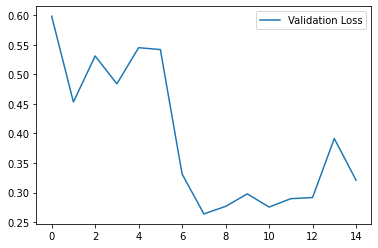

In [11]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [12]:
model.save("Models/Trained1")

INFO:tensorflow:Assets written to: Models/Trained1\assets


In [13]:
import shutil
shutil.make_archive('Models/Trained1zipped', 'zip', 'Models/Trained1');

'd:\\My C and Python Projects\\Repos\\Imitation_learning\\Models\\Trained1zipped.zip'